In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Tarea 5. Clustering.**
   

In [ ]:
!pip install pysal
!pip install contextily
!pip install geopandas 
!pip install sklearn
!pip install -U scikit-learn

     |████████████████████████████████| 2.4 MB 10.2 MB/s 
     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 60 kB 7.0 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 164 kB 52.0 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 41 kB 635 kB/s 
     |████████████████████████████████| 209 kB 50.8 MB/s 
     |████████████████████████████████| 5.7 MB 15.9 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 138 kB 25.0 MB/s 
     |████████████████████████████████| 226 kB 54.7 MB/s 
     |████████████████████████████████| 240 kB 49.0 MB/s 
     |████████████████████████████████| 56.1 MB 29 kB/s 
     |████████████████████████████████| 111 kB 53.0 MB/s 
     |████████████████████████████████| 183 kB 34.5 MB/s 
     |████████████████████████████████| 994 kB 50.5 MB/s 
     |█████████████████████

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node__interactivity = "all"
%matplotlib inline 

In [ ]:
import contextily as ctx
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot
import seaborn as sns
import geopandas as gpd
from pysal.lib import weights
from pysal.lib import cg as geometry
from pysal.explore import esda
from pysal.viz import splot
from sklearn import cluster
from pysal.lib import weights as ct
np.random.seed(123)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
abb = gpd.read_file('/content/drive/MyDrive/Geoinformatica/Proyecto/shapes/shapes cultivos ilicitos/2015ci_clean.shp') 

In [ ]:
# Fija el CRS manualmente. 
abb.crs = {'init': u'epsg:3685'}
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    84 non-null     object  
 1   CVE_ENT   84 non-null     object  
 2   CVE_MUN   84 non-null     object  
 3   NOMGEO    84 non-null     object  
 4   NoPM2015  84 non-null     int64   
 5   NoPA2015  84 non-null     int64   
 6   HcPM2015  84 non-null     float64 
 7   HcPA2015  84 non-null     float64 
 8   geometry  84 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 6.0+ KB


####Definición de variables 

In [ ]:
ratings = [  'NoPM2015', 'HcPM2015' ]

#####Mapas de variables 

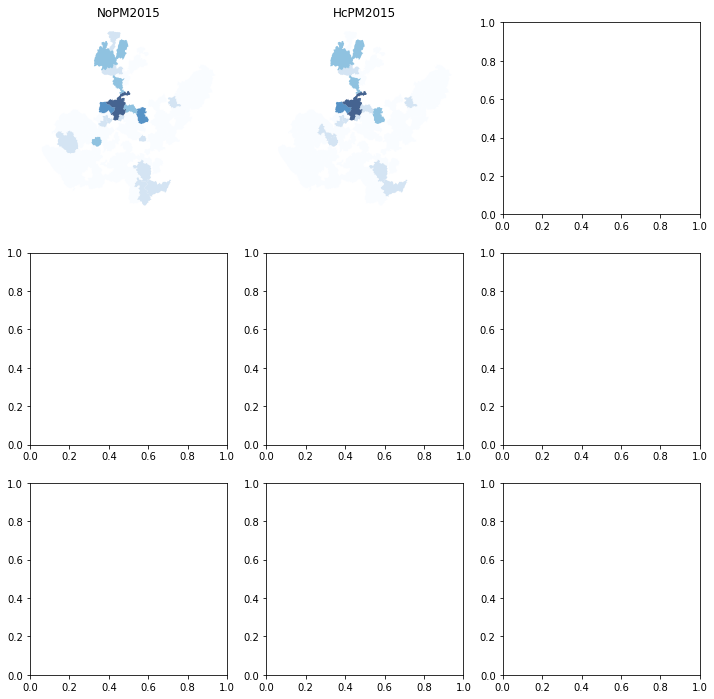

In [ ]:
# Crea figura y ejes (en este caso es un arreglo de 3 x 3)
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Hace los ejes accesibles con una sola indexación
axs = axs.flatten()
# Comienza el loop sobre las variables de interés
for i, col in enumerate(ratings):
    # Selecciona el eje en el que el irá el mapa.
    ax = axs[i]
    # Grafica el mapa
    abb.plot(column=col, ax=ax, scheme='naturalbreaks', \
             linewidth=0, cmap='Blues', alpha=0.75)
    # Remueve "basura" del eje
    ax.set_axis_off()
    # Le pone el nombre de la variable a cada eje
    ax.set_title(col)
# Despliega la figura
plt.show()

####Correlación de variables 

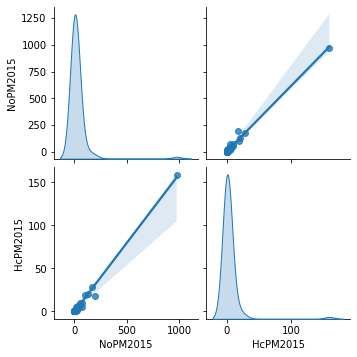

In [ ]:
_ = sns.pairplot(abb[ratings], kind='reg', diag_kind='kde')

####Clasificación geodemográfica con K-means

In [ ]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [ ]:
kmeans5

KMeans(n_clusters=5)

In [ ]:
# Esta línea se utiliza para obtener el mismo resultado siempre que se replique el análisis
np.random.seed(1234)
# Ejecuta el algoritmo de agrupamiento
k5cls = kmeans5.fit(abb[ratings])

In [ ]:
k5cls.labels_

array([3, 3, 0, 3, 0, 3, 4, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
abb['k5cls'] = k5cls.labels_

####Mapa de categorías

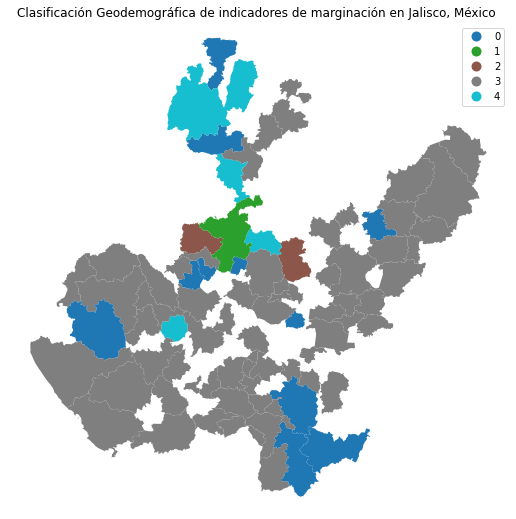

In [ ]:
# Ajusta figura y ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficar valores únicos coropletas incluyendo una leyenda y sin líneas de límite
abb.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# Mentiene los ejes proporcionados
plt.axis('equal')
# Agrega título
plt.title('Clasificación Geodemográfica de indicadores de marginación en Jalisco, México ')
# Despliega el mapa
plt.show()

####Número de observaciones por cada categoría

In [ ]:
k5sizes = abb.groupby('k5cls').size()
k5sizes

k5cls
0    11
1     1
2     2
3    66
4     4
dtype: int64

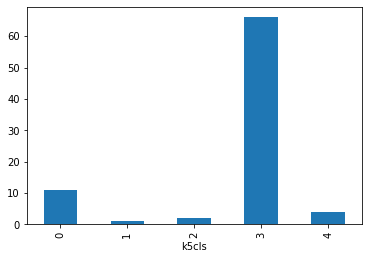

In [ ]:
_ = k5sizes.plot.bar()

####Valor promedio de cada variable por categoría 

In [ ]:
k5means = abb.groupby('k5cls')[ratings].mean()
# Muestra la tabla transpuesta
k5means.T

k5cls,0,1,2,3,4
NoPM2015,30.545455,975.000000,183.00000,2.318182,95.00000
HcPM2015,4.486227,158.383001,23.08075,0.323577,13.78695


####Promedio, desviación estándar y cuartiles de cada variable por categoría

In [ ]:
# Calcular el summary 
# Si deseas desplegar todas las columnas descomenta la siguiente línea
#pd.set_option("display.max_columns", None)
k5desc = abb.groupby('k5cls')[ratings].describe()
# Muestra la tabla
k5desc

NoPM2015                         ...    HcPM2015                        
         count        mean        std  ...         50%         75%         max
k5cls                                  ...                                    
0         11.0   30.545455  10.491555  ...    4.620000    5.837500    9.695000
1          1.0  975.000000        NaN  ...  158.383001  158.383001  158.383001
2          2.0  183.000000  15.556349  ...   23.080750   25.717625   28.354499
3         66.0    2.318182   4.023619  ...    0.000000    0.307000    5.500000
4          4.0   95.000000  26.166136  ...   14.735500   19.461700   20.369800

[5 rows x 16 columns]

In [ ]:
#Otra forma de representar los resultados de la tabla anterior
for clus in k5desc.T:
    print('\n\t---------\n\tCluster %i'%clus)
    print(k5desc.T[clus].unstack())


	---------
	Cluster 0
          count       mean        std     min       25%    50%      75%     max
NoPM2015   11.0  30.545455  10.491555  17.000  23.00000  29.00  33.0000  54.000
HcPM2015   11.0   4.486227   2.528026   1.355   2.19125   4.62   5.8375   9.695

	---------
	Cluster 1
          count        mean  std  ...         50%         75%         max
NoPM2015    1.0  975.000000  NaN  ...  975.000000  975.000000  975.000000
HcPM2015    1.0  158.383001  NaN  ...  158.383001  158.383001  158.383001

[2 rows x 8 columns]

	---------
	Cluster 2
          count       mean        std  ...        50%         75%         max
NoPM2015    2.0  183.00000  15.556349  ...  183.00000  188.500000  194.000000
HcPM2015    2.0   23.08075   7.458208  ...   23.08075   25.717625   28.354499

[2 rows x 8 columns]

	---------
	Cluster 3
          count      mean       std  min  25%  50%    75%   max
NoPM2015   66.0  2.318182  4.023619  0.0  0.0  0.0  2.750  15.0
HcPM2015   66.0  0.323577  0.799183  0.0

In [ ]:
# Nombrar (index) los renglones por la categoría a la que pertenecen 
to_plot = abb.set_index('k5cls')
# Subconjutno que solo mantiene las variables utilizadas por el K-Means
to_plot = to_plot[ratings]
# Muestra la tabla
to_plot.head()

,NoPM2015,HcPM2015
k5cls,,
3,0,0.00
3,5,0.54
0,43,4.62
3,6,0.83
0,32,6.77


In [ ]:
to_plot = to_plot.stack()
to_plot.head()

0  k5cls              3
   Variable    NoPM2015
   Valor              0
1  k5cls              3
   Variable    HcPM2015
dtype: object

In [ ]:
to_plot = to_plot.reset_index()
to_plot.head()

,index,level_0,Variable,Valor
0,0,0,k5cls,3
1,1,0,Variable,NoPM2015
2,2,0,Valor,0
3,3,1,k5cls,3
4,4,1,Variable,HcPM2015


In [ ]:
to_plot = to_plot.rename(columns={'level_1': 'Variable', 0: 'Valor'})
to_plot.head()

,index,level_0,Variable,Valor
0,0,0,k5cls,3
1,1,0,Variable,NoPM2015
2,2,0,Valor,0
3,3,1,k5cls,3
4,4,1,Variable,HcPM2015


####Distribución de valores por categoría

In [ ]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Valor', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

KeyError: ignored

####Agrupamiento jerárquico 

In [ ]:
  # Siembra semilla para que el resultado sea reproducible
np.random.seed(0)
# Inicia el algoritmo, la opción ward minimiza la varianza de los cúmulos que se fusionan
model = cluster.AgglomerativeClustering(linkage='ward', n_clusters=5)
# Ejecuta el agrupamiento
model.fit(abb[ratings])
# Asigna etiquetas a la tabla
abb['clus_ahc'] =model.labels_

In [ ]:
ahc_size = abb.groupby('clus_ahc').size()
ahc_size

clus_ahc
0     7
1    39
2     2
3    36
4    41
dtype: int64

In [ ]:
ahc_means = abb.groupby('clus_ahc')[ratings].mean()
ahc_means.T

clus_ahc,0,1,2,3,4
NoPM2015,79.500000,183.00000,19.647059,975.000000,1.000000
HcPM2015,11.577133,23.08075,2.955382,158.383001,0.106002


In [ ]:
# Index db on cluster ID
tidy_db = abb.set_index('clus_ahc')
# Keep only variables used for clustering
tidy_db = tidy_db[ratings]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,clus_ahc,Attribute,Values
0,4,NoPM2015,0.00
1,4,HcPM2015,0.00
2,4,NoPM2015,5.00
3,4,HcPM2015,0.54
4,0,NoPM2015,43.00


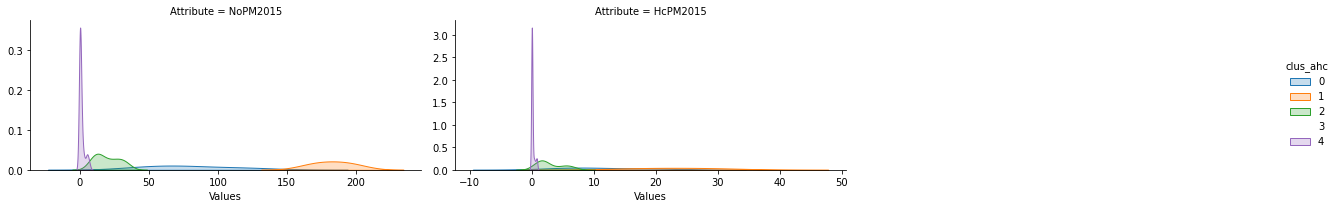

In [ ]:
# Setup the facets
facets = sns.FacetGrid(data=tidy_db, col='Attribute', hue='clus_ahc', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

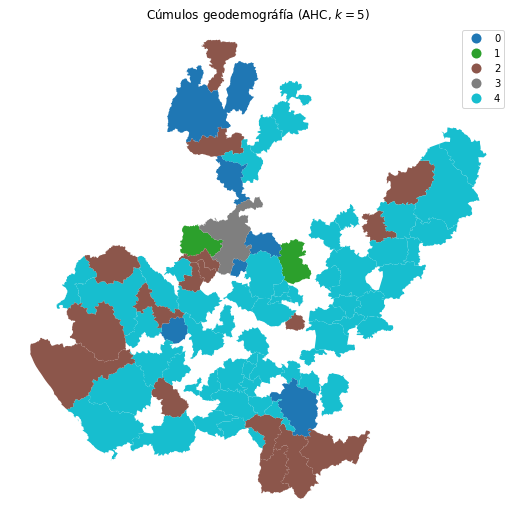

In [ ]:
abb['clus_ahc'] =model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
abb.plot(column='clus_ahc', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Cúmulos geodemográfía (AHC, $k=5$)')
# Display the map
plt.show()

####Regionalización

In [ ]:
# Se crea la matriz de pesos por contiguidad de reina
w_queen = ct.Queen.from_dataframe(abb)
w_queen.islands
# La matriz tiene al menos un elemento sin contiguidad

[46]

In [ ]:
#Para solucionar el problema se crea la matriz de vecinos más cercanos de orden 1
w_k1 = ct.KNN.from_dataframe(abb, k=1)
w_k1.islands

[]

In [ ]:
# Y se mezclan ambas matrices para asegurar que todos los elementos tengan al menos una interacción
w_queen.islands

[46]

In [ ]:
sagg13 = cluster.AgglomerativeClustering(n_clusters=13, connectivity=w_queen.sparse)
sagg13

AgglomerativeClustering(connectivity=<84x84 sparse matrix of type '<class 'numpy.float64'>'
	with 286 stored elements in Compressed Sparse Row format>,
                        n_clusters=13)

In [ ]:
# This line is required to obtain the same results always
np.random.seed(1234)
# Run the clustering algorithm
sagg13cls = sagg13.fit(abb[ratings])

In [ ]:
abb['sagg13cls'] = sagg13cls.labels_

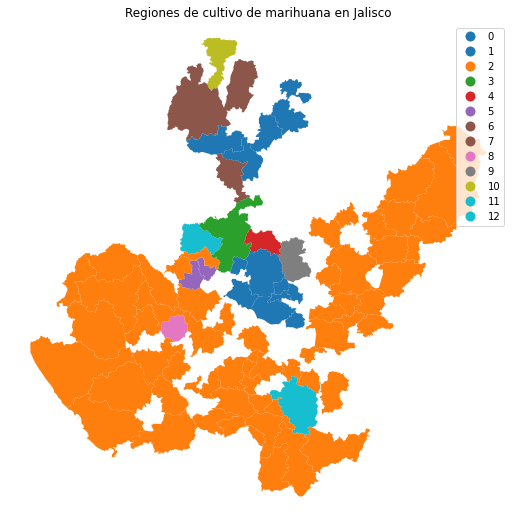

In [ ]:
# Ajusta figura y ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica por coro´pletas
abb.plot(column='sagg13cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionados
plt.axis('equal')
#AGrega título
plt.title('Regiones de cultivo de marihuana en Jalisco')
# Muestra el mapo
plt.show()

In [ ]:
def dissolve(gs):
    '''
    Take a series of polygons and dissolve them into a single one
    
    Arguments
    ---------
    gs        : GeoSeries
                Sequence of polygons to be dissolved
    Returns
    -------
    dissolved : Polygon
                Single polygon containing all the polygons in `gs`
    '''
    return gs.unary_union

In [ ]:
# Dissolve de los polígonos basados en `sagg13cls`
abb_boroughs = gpd.GeoSeries(abb.groupby(abb['sagg13cls'])\
                                .apply(dissolve),
                             crs=abb.crs)

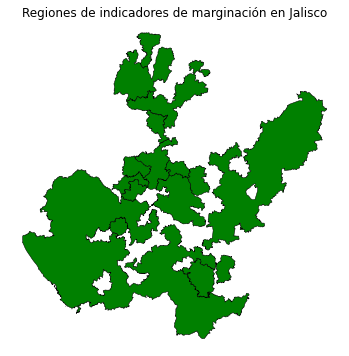

In [ ]:
# AJusta figura y ejes
f, ax = plt.subplots(1, figsize=(6, 6))
# Grafica las líneas de límites
abb_boroughs.plot(ax=ax, linewidth=0.5,\
                  facecolor='green', edgecolor='k')
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionales
plt.axis('equal')
# Agrega título
plt.title('Regiones de cultivo de marihuana en Jalisco')
# Despliega el mapa
plt.show()